In [1]:
from google.colab import files
uploaded = files.upload()

Saving MetroPT3(AirCompressor).csv to MetroPT3(AirCompressor).csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [242]:
data = pd.read_csv("C:\\Users\\hp\\Desktop\\SANYAM\\UT AUSTIN\\Fall\\Advanced_ML\\project\\MetroPT3(AirCompressor).csv")
data = data.drop('Unnamed: 0', axis=1)

In [243]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

In [244]:
data['failure'] = 0

In [245]:
data.loc[(data.index>='2020-04-18 00:00:00') & (data.index<='2020-04-18 23:59:00'), 'failure'] = 1
data.loc[(data.index>='2020-05-29 23:30:00') & (data.index<='2020-05-30 06:00:00'), 'failure'] = 1
data.loc[(data.index>='2020-06-05 10:00:00') & (data.index<='2020-06-07 14:30:00'), 'failure'] = 1
data.loc[(data.index>='2020-07-15 14:30:00') & (data.index<='2020-07-15 19:00:00'), 'failure'] = 1

In [246]:
data['failure'].value_counts()

failure
0    1486994
1      29954
Name: count, dtype: int64

In [7]:
data.head()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,failure
timestamp,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [8]:
data.reset_index(inplace=True)

In [9]:
data.head(5)

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,failure
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [10]:
data.sort_values(by='timestamp', inplace=True)

In [11]:
# data['time_diff'] = pd.Timedelta(seconds=0)

In [12]:
df = data[['timestamp' , 'failure']].copy()

In [13]:
df

,timestamp,failure
0,2020-02-01 00:00:00,0
1,2020-02-01 00:00:10,0
2,2020-02-01 00:00:19,0
3,2020-02-01 00:00:29,0
4,2020-02-01 00:00:39,0
...,...,...
1516943,2020-09-01 03:59:10,0
1516944,2020-09-01 03:59:20,0
1516945,2020-09-01 03:59:30,0
1516946,2020-09-01 03:59:40,0


In [26]:
df.to_csv('C:\\Users\\hp\\Desktop\\SANYAM\\UT AUSTIN\\Fall\\Advanced_ML\\project\\MetroPT3(AirCompressor)_time_diff.csv' , header=True, index=True)

In [28]:
# for i in range(len(df)):
#     # Find the next occurrence where failure is 1
#     next_failure = df[(df['failure'] == 1) & (df.index > i)]
#     if not next_failure.empty:
#         # Calculate the time difference
#         time_diff = next_failure.iloc[0]['timestamp'] - df.iloc[i]['timestamp']
#         df.at[i, 'time_diff'] = time_diff

In [14]:
def find_least_greater(row_value, comparison_list):
    greater_values = [i for i in comparison_list if i > row_value]
    return min(greater_values, default=pd.NaT)  # Returns None if no greater value is found


In [15]:
values_list = ['2020-04-18 00:00:00', '2020-05-29 23:30:00', '2020-06-05 10:00:00', '2020-07-15 14:30:00']
values_list = pd.to_datetime(values_list)

In [16]:
df['nearest_future_fail_time'] = df['timestamp'].apply(lambda x: find_least_greater(x, values_list))


In [17]:
df.loc[df['failure'].isin([1]), 'nearest_future_fail_time'] = 0

In [18]:
df[df['failure'] == 1].head()

,timestamp,failure,nearest_future_fail_time
562564,2020-04-18 00:00:01,1,0
562565,2020-04-18 00:00:13,1,0
562566,2020-04-18 00:00:24,1,0
562567,2020-04-18 00:00:36,1,0
562568,2020-04-18 00:00:49,1,0


In [19]:
df.head(5)

,timestamp,failure,nearest_future_fail_time
0,2020-02-01 00:00:00,0,2020-04-18 00:00:00
1,2020-02-01 00:00:10,0,2020-04-18 00:00:00
2,2020-02-01 00:00:19,0,2020-04-18 00:00:00
3,2020-02-01 00:00:29,0,2020-04-18 00:00:00
4,2020-02-01 00:00:39,0,2020-04-18 00:00:00


In [20]:
df['nearest_future_fail_time'] = pd.to_datetime(df['nearest_future_fail_time'])



In [21]:
#create time_diff column
df['time_diff'] = df['nearest_future_fail_time'] - df['timestamp']

In [22]:
df.iloc[101010:101015]

,timestamp,failure,nearest_future_fail_time,time_diff
101010,2020-02-14 16:33:05,0,2020-04-18,63 days 07:26:55
101011,2020-02-14 16:33:15,0,2020-04-18,63 days 07:26:45
101012,2020-02-14 16:33:25,0,2020-04-18,63 days 07:26:35
101013,2020-02-14 16:33:35,0,2020-04-18,63 days 07:26:25
101014,2020-02-14 16:33:45,0,2020-04-18,63 days 07:26:15


In [23]:
df[df['failure'] == 1].head()

,timestamp,failure,nearest_future_fail_time,time_diff
562564,2020-04-18 00:00:01,1,1970-01-01,-18371 days +23:59:59
562565,2020-04-18 00:00:13,1,1970-01-01,-18371 days +23:59:47
562566,2020-04-18 00:00:24,1,1970-01-01,-18371 days +23:59:36
562567,2020-04-18 00:00:36,1,1970-01-01,-18371 days +23:59:24
562568,2020-04-18 00:00:49,1,1970-01-01,-18371 days +23:59:11


In [24]:
df.loc[df['failure'].isin([1]), 'time_diff'] = 0

In [25]:
df[df['failure'] == 1].head()

,timestamp,failure,nearest_future_fail_time,time_diff
562564,2020-04-18 00:00:01,1,1970-01-01,0
562565,2020-04-18 00:00:13,1,1970-01-01,0
562566,2020-04-18 00:00:24,1,1970-01-01,0
562567,2020-04-18 00:00:36,1,1970-01-01,0
562568,2020-04-18 00:00:49,1,1970-01-01,0


In [138]:
df.to_csv('C:\\Users\\hp\\Desktop\\SANYAM\\UT AUSTIN\\Fall\\Advanced_ML\\project\\MetroPT3(AirCompressor)_time_diff2.csv' , header=True, index=True)

In [26]:
# join data and df on timestamp
data = data.merge(df[['timestamp','time_diff','nearest_future_fail_time']], on='timestamp', how='left')

In [27]:
data.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,failure,time_diff,nearest_future_fail_time
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,77 days 00:00:00,2020-04-18
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,76 days 23:59:50,2020-04-18
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,76 days 23:59:41,2020-04-18
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,76 days 23:59:31,2020-04-18
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,76 days 23:59:21,2020-04-18


In [28]:
data.set_index('timestamp', inplace=True)

In [29]:
data.head(5)

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,failure,time_diff,nearest_future_fail_time
timestamp,,,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,77 days 00:00:00,2020-04-18
2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,76 days 23:59:50,2020-04-18
2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,76 days 23:59:41,2020-04-18
2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,76 days 23:59:31,2020-04-18
2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,76 days 23:59:21,2020-04-18


In [30]:
data['time_diff'] = pd.to_timedelta(data['time_diff'])
data.dtypes

TP2                                 float64
TP3                                 float64
H1                                  float64
DV_pressure                         float64
Reservoirs                          float64
Oil_temperature                     float64
Motor_current                       float64
COMP                                float64
DV_eletric                          float64
Towers                              float64
MPG                                 float64
LPS                                 float64
Pressure_switch                     float64
Oil_level                           float64
Caudal_impulses                     float64
failure                               int64
time_diff                   timedelta64[ns]
nearest_future_fail_time     datetime64[ns]
dtype: object

### Rolling Averages

In [33]:
rolling_avgs = data.drop(columns = ['time_diff','nearest_future_fail_time']).rolling(window=60).mean()

In [35]:
rolling_avgs.iloc[58:63]

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,failure
timestamp,,,,,,,,,,,,,,,,
2020-02-01 00:09:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01 00:09:45,-0.013000,9.058600,9.043100,-0.022800,9.059300,53.049167,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2020-02-01 00:09:55,-0.013033,9.048633,9.033200,-0.022767,9.049333,53.029583,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2020-02-01 00:10:04,-0.013033,9.038667,9.023267,-0.022800,9.039367,53.005417,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2020-02-01 00:10:14,-0.013067,9.028700,9.013367,-0.022800,9.029400,52.982083,0.039958,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [36]:
df.head()

,timestamp,failure,nearest_future_fail_time,time_diff
0,2020-02-01 00:00:00,0,2020-04-18,77 days 00:00:00
1,2020-02-01 00:00:10,0,2020-04-18,76 days 23:59:50
2,2020-02-01 00:00:19,0,2020-04-18,76 days 23:59:41
3,2020-02-01 00:00:29,0,2020-04-18,76 days 23:59:31
4,2020-02-01 00:00:39,0,2020-04-18,76 days 23:59:21


In [40]:
# join rolling_avgs and df on timestamp
df2 = rolling_avgs.merge(df.rename(columns = {'failure': 'failure_abs'}), on='timestamp', how='left')

In [41]:
df2.iloc[58:63]

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,failure,failure_abs,nearest_future_fail_time,time_diff
58,2020-02-01 00:09:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2020-04-18,76 days 23:50:25
59,2020-02-01 00:09:45,-0.013000,9.058600,9.043100,-0.022800,9.059300,53.049167,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0,2020-04-18,76 days 23:50:15
60,2020-02-01 00:09:55,-0.013033,9.048633,9.033200,-0.022767,9.049333,53.029583,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0,2020-04-18,76 days 23:50:05
61,2020-02-01 00:10:04,-0.013033,9.038667,9.023267,-0.022800,9.039367,53.005417,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0,2020-04-18,76 days 23:49:56
62,2020-02-01 00:10:14,-0.013067,9.028700,9.013367,-0.022800,9.029400,52.982083,0.039958,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0,2020-04-18,76 days 23:49:46


In [42]:
# remove rows with failure = NaN
df2 = df2[df2['failure'].notna()]

In [44]:
df2.head(5)

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,failure,failure_abs,nearest_future_fail_time,time_diff
59,2020-02-01 00:09:45,-0.013000,9.058600,9.043100,-0.022800,9.059300,53.049167,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0,2020-04-18,76 days 23:50:15
60,2020-02-01 00:09:55,-0.013033,9.048633,9.033200,-0.022767,9.049333,53.029583,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0,2020-04-18,76 days 23:50:05
61,2020-02-01 00:10:04,-0.013033,9.038667,9.023267,-0.022800,9.039367,53.005417,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0,2020-04-18,76 days 23:49:56
62,2020-02-01 00:10:14,-0.013067,9.028700,9.013367,-0.022800,9.029400,52.982083,0.039958,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0,2020-04-18,76 days 23:49:46
63,2020-02-01 00:10:24,-0.013100,9.018767,9.003467,-0.022833,9.019467,52.963333,0.039958,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0,2020-04-18,76 days 23:49:36


In [47]:
rolling_stdev = data.drop(columns = ['time_diff','nearest_future_fail_time']).rolling(window=60).std()

In [48]:
rolling_stdev.iloc[58:63]

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,failure
timestamp,,,,,,,,,,,,,,,,
2020-02-01 00:09:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01 00:09:45,0.001008,0.174851,0.174170,0.000988,0.174430,0.352532,0.000797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01 00:09:55,0.001008,0.174539,0.173890,0.000981,0.174158,0.354047,0.000797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01 00:10:04,0.001008,0.174228,0.173554,0.000988,0.173887,0.358702,0.000797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01 00:10:14,0.001006,0.173918,0.173166,0.000988,0.173618,0.364851,0.000727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
rolling_std_dev_df = rolling_stdev.add_suffix('_stdev_60')

In [50]:
rolling_std_dev_df.iloc[58:63]

,TP2_stdev_60,TP3_stdev_60,H1_stdev_60,DV_pressure_stdev_60,Reservoirs_stdev_60,Oil_temperature_stdev_60,Motor_current_stdev_60,COMP_stdev_60,DV_eletric_stdev_60,Towers_stdev_60,MPG_stdev_60,LPS_stdev_60,Pressure_switch_stdev_60,Oil_level_stdev_60,Caudal_impulses_stdev_60,failure_stdev_60
timestamp,,,,,,,,,,,,,,,,
2020-02-01 00:09:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01 00:09:45,0.001008,0.174851,0.174170,0.000988,0.174430,0.352532,0.000797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01 00:09:55,0.001008,0.174539,0.173890,0.000981,0.174158,0.354047,0.000797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01 00:10:04,0.001008,0.174228,0.173554,0.000988,0.173887,0.358702,0.000797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01 00:10:14,0.001006,0.173918,0.173166,0.000988,0.173618,0.364851,0.000727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
# join rolling_std_dev_df and df2 on timestamp
df3 = df2.merge(rolling_std_dev_df, on='timestamp', how='left')

In [166]:
df3.head(5)

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,...,Motor_current_stdev_60,COMP_stdev_60,DV_eletric_stdev_60,Towers_stdev_60,MPG_stdev_60,LPS_stdev_60,Pressure_switch_stdev_60,Oil_level_stdev_60,Caudal_impulses_stdev_60,failure_stdev_60
0,2020-02-01 00:09:45,-0.013000,9.058600,9.043100,-0.022800,9.059300,53.049167,0.040000,1.0,0.0,...,0.000797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02-01 00:09:55,-0.013033,9.048633,9.033200,-0.022767,9.049333,53.029583,0.040000,1.0,0.0,...,0.000797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-01 00:10:04,-0.013033,9.038667,9.023267,-0.022800,9.039367,53.005417,0.040000,1.0,0.0,...,0.000797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-01 00:10:14,-0.013067,9.028700,9.013367,-0.022800,9.029400,52.982083,0.039958,1.0,0.0,...,0.000727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-01 00:10:24,-0.013100,9.018767,9.003467,-0.022833,9.019467,52.963333,0.039958,1.0,0.0,...,0.000727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
print(df3.columns)

Index(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses',
       'failure', 'failure_abs', 'nearest_future_fail_time', 'time_diff',
       'TP2_stdev_60', 'TP3_stdev_60', 'H1_stdev_60', 'DV_pressure_stdev_60',
       'Reservoirs_stdev_60', 'Oil_temperature_stdev_60',
       'Motor_current_stdev_60', 'COMP_stdev_60', 'DV_eletric_stdev_60',
       'Towers_stdev_60', 'MPG_stdev_60', 'LPS_stdev_60',
       'Pressure_switch_stdev_60', 'Oil_level_stdev_60',
       'Caudal_impulses_stdev_60', 'failure_stdev_60'],
      dtype='object')


In [168]:
col_list = sorted(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses',
       'TP2_stdev_60', 'TP3_stdev_60', 'H1_stdev_60', 'DV_pressure_stdev_60',
       'Reservoirs_stdev_60', 'Oil_temperature_stdev_60',
       'Motor_current_stdev_60', 'COMP_stdev_60', 'DV_eletric_stdev_60',
       'Towers_stdev_60', 'MPG_stdev_60', 'LPS_stdev_60',
       'Pressure_switch_stdev_60', 'Oil_level_stdev_60',
       'Caudal_impulses_stdev_60', 'failure_stdev_60','time_diff','failure_abs'])

In [169]:
col_list = ['timestamp','COMP','COMP_stdev_60','Caudal_impulses','Caudal_impulses_stdev_60','DV_eletric','DV_eletric_stdev_60','DV_pressure','DV_pressure_stdev_60','H1','H1_stdev_60','LPS','LPS_stdev_60','MPG','MPG_stdev_60','Motor_current','Motor_current_stdev_60','Oil_level','Oil_level_stdev_60','Oil_temperature','Oil_temperature_stdev_60','Pressure_switch','Pressure_switch_stdev_60','Reservoirs','Reservoirs_stdev_60','TP2','TP2_stdev_60','TP3','TP3_stdev_60','Towers','Towers_stdev_60','failure_stdev_60','time_diff','failure_abs']

In [170]:
df3 = df3[col_list]

In [171]:
df3.head()

,timestamp,COMP,COMP_stdev_60,Caudal_impulses,Caudal_impulses_stdev_60,DV_eletric,DV_eletric_stdev_60,DV_pressure,DV_pressure_stdev_60,H1,...,Reservoirs_stdev_60,TP2,TP2_stdev_60,TP3,TP3_stdev_60,Towers,Towers_stdev_60,failure_stdev_60,time_diff,failure_abs
0,2020-02-01 00:09:45,1.0,0.0,1.0,0.0,0.0,0.0,-0.022800,0.000988,9.043100,...,0.174430,-0.013000,0.001008,9.058600,0.174851,1.0,0.0,0.0,76 days 23:50:15,0
1,2020-02-01 00:09:55,1.0,0.0,1.0,0.0,0.0,0.0,-0.022767,0.000981,9.033200,...,0.174158,-0.013033,0.001008,9.048633,0.174539,1.0,0.0,0.0,76 days 23:50:05,0
2,2020-02-01 00:10:04,1.0,0.0,1.0,0.0,0.0,0.0,-0.022800,0.000988,9.023267,...,0.173887,-0.013033,0.001008,9.038667,0.174228,1.0,0.0,0.0,76 days 23:49:56,0
3,2020-02-01 00:10:14,1.0,0.0,1.0,0.0,0.0,0.0,-0.022800,0.000988,9.013367,...,0.173618,-0.013067,0.001006,9.028700,0.173918,1.0,0.0,0.0,76 days 23:49:46,0
4,2020-02-01 00:10:24,1.0,0.0,1.0,0.0,0.0,0.0,-0.022833,0.000994,9.003467,...,0.173293,-0.013100,0.001003,9.018767,0.173554,1.0,0.0,0.0,76 days 23:49:36,0


In [172]:
df3['time_diff'] = pd.to_timedelta(df3['time_diff'])
df3['time_diff'] = df3['time_diff'].dt.total_seconds()

In [173]:
df3.head()

,timestamp,COMP,COMP_stdev_60,Caudal_impulses,Caudal_impulses_stdev_60,DV_eletric,DV_eletric_stdev_60,DV_pressure,DV_pressure_stdev_60,H1,...,Reservoirs_stdev_60,TP2,TP2_stdev_60,TP3,TP3_stdev_60,Towers,Towers_stdev_60,failure_stdev_60,time_diff,failure_abs
0,2020-02-01 00:09:45,1.0,0.0,1.0,0.0,0.0,0.0,-0.022800,0.000988,9.043100,...,0.174430,-0.013000,0.001008,9.058600,0.174851,1.0,0.0,0.0,6652215.0,0
1,2020-02-01 00:09:55,1.0,0.0,1.0,0.0,0.0,0.0,-0.022767,0.000981,9.033200,...,0.174158,-0.013033,0.001008,9.048633,0.174539,1.0,0.0,0.0,6652205.0,0
2,2020-02-01 00:10:04,1.0,0.0,1.0,0.0,0.0,0.0,-0.022800,0.000988,9.023267,...,0.173887,-0.013033,0.001008,9.038667,0.174228,1.0,0.0,0.0,6652196.0,0
3,2020-02-01 00:10:14,1.0,0.0,1.0,0.0,0.0,0.0,-0.022800,0.000988,9.013367,...,0.173618,-0.013067,0.001006,9.028700,0.173918,1.0,0.0,0.0,6652186.0,0
4,2020-02-01 00:10:24,1.0,0.0,1.0,0.0,0.0,0.0,-0.022833,0.000994,9.003467,...,0.173293,-0.013100,0.001003,9.018767,0.173554,1.0,0.0,0.0,6652176.0,0


In [174]:
df3['time_diff'] = df3['time_diff']/60

In [176]:
df3['time_diff'] = df3['time_diff'].round(0)

In [177]:
df3.head()

,timestamp,COMP,COMP_stdev_60,Caudal_impulses,Caudal_impulses_stdev_60,DV_eletric,DV_eletric_stdev_60,DV_pressure,DV_pressure_stdev_60,H1,...,Reservoirs_stdev_60,TP2,TP2_stdev_60,TP3,TP3_stdev_60,Towers,Towers_stdev_60,failure_stdev_60,time_diff,failure_abs
0,2020-02-01 00:09:45,1.0,0.0,1.0,0.0,0.0,0.0,-0.022800,0.000988,9.043100,...,0.174430,-0.013000,0.001008,9.058600,0.174851,1.0,0.0,0.0,110870.0,0
1,2020-02-01 00:09:55,1.0,0.0,1.0,0.0,0.0,0.0,-0.022767,0.000981,9.033200,...,0.174158,-0.013033,0.001008,9.048633,0.174539,1.0,0.0,0.0,110870.0,0
2,2020-02-01 00:10:04,1.0,0.0,1.0,0.0,0.0,0.0,-0.022800,0.000988,9.023267,...,0.173887,-0.013033,0.001008,9.038667,0.174228,1.0,0.0,0.0,110870.0,0
3,2020-02-01 00:10:14,1.0,0.0,1.0,0.0,0.0,0.0,-0.022800,0.000988,9.013367,...,0.173618,-0.013067,0.001006,9.028700,0.173918,1.0,0.0,0.0,110870.0,0
4,2020-02-01 00:10:24,1.0,0.0,1.0,0.0,0.0,0.0,-0.022833,0.000994,9.003467,...,0.173293,-0.013100,0.001003,9.018767,0.173554,1.0,0.0,0.0,110870.0,0


In [178]:
df3[df3['failure_abs'] == 1].head(5)

,timestamp,COMP,COMP_stdev_60,Caudal_impulses,Caudal_impulses_stdev_60,DV_eletric,DV_eletric_stdev_60,DV_pressure,DV_pressure_stdev_60,H1,...,Reservoirs_stdev_60,TP2,TP2_stdev_60,TP3,TP3_stdev_60,Towers,Towers_stdev_60,failure_stdev_60,time_diff,failure_abs
562505,2020-04-18 00:00:01,0.766667,0.426522,0.766667,0.426522,0.0,0.0,-0.024,0.0,8.238,...,0.0,-0.018,0.0,8.248,0.0,0.766667,0.426522,0.129099,0.0,1
562506,2020-04-18 00:00:13,0.766667,0.426522,0.766667,0.426522,0.0,0.0,-0.024,0.0,8.238,...,0.0,-0.018,0.0,8.248,0.0,0.766667,0.426522,0.181020,0.0,1
562507,2020-04-18 00:00:24,0.766667,0.426522,0.766667,0.426522,0.0,0.0,-0.024,0.0,8.238,...,0.0,-0.018,0.0,8.248,0.0,0.766667,0.426522,0.219784,0.0,1
562508,2020-04-18 00:00:36,0.766667,0.426522,0.766667,0.426522,0.0,0.0,-0.024,0.0,8.238,...,0.0,-0.018,0.0,8.248,0.0,0.766667,0.426522,0.251549,0.0,1
562509,2020-04-18 00:00:49,0.766667,0.426522,0.766667,0.426522,0.0,0.0,-0.024,0.0,8.238,...,0.0,-0.018,0.0,8.248,0.0,0.766667,0.426522,0.278718,0.0,1


In [179]:
mask = df3['time_diff'].isnull()

In [180]:
df4 = df3[~mask].copy()

In [181]:
df4.head(5)

,timestamp,COMP,COMP_stdev_60,Caudal_impulses,Caudal_impulses_stdev_60,DV_eletric,DV_eletric_stdev_60,DV_pressure,DV_pressure_stdev_60,H1,...,Reservoirs_stdev_60,TP2,TP2_stdev_60,TP3,TP3_stdev_60,Towers,Towers_stdev_60,failure_stdev_60,time_diff,failure_abs
0,2020-02-01 00:09:45,1.0,0.0,1.0,0.0,0.0,0.0,-0.022800,0.000988,9.043100,...,0.174430,-0.013000,0.001008,9.058600,0.174851,1.0,0.0,0.0,110870.0,0
1,2020-02-01 00:09:55,1.0,0.0,1.0,0.0,0.0,0.0,-0.022767,0.000981,9.033200,...,0.174158,-0.013033,0.001008,9.048633,0.174539,1.0,0.0,0.0,110870.0,0
2,2020-02-01 00:10:04,1.0,0.0,1.0,0.0,0.0,0.0,-0.022800,0.000988,9.023267,...,0.173887,-0.013033,0.001008,9.038667,0.174228,1.0,0.0,0.0,110870.0,0
3,2020-02-01 00:10:14,1.0,0.0,1.0,0.0,0.0,0.0,-0.022800,0.000988,9.013367,...,0.173618,-0.013067,0.001006,9.028700,0.173918,1.0,0.0,0.0,110870.0,0
4,2020-02-01 00:10:24,1.0,0.0,1.0,0.0,0.0,0.0,-0.022833,0.000994,9.003467,...,0.173293,-0.013100,0.001003,9.018767,0.173554,1.0,0.0,0.0,110870.0,0


In [182]:
df4.set_index('timestamp', inplace=True)

In [183]:
X = df4.drop(columns=['failure_abs','time_diff'])
y = df4['time_diff']
# y = y.dt.total_seconds()


In [184]:
df4.head(5)

,COMP,COMP_stdev_60,Caudal_impulses,Caudal_impulses_stdev_60,DV_eletric,DV_eletric_stdev_60,DV_pressure,DV_pressure_stdev_60,H1,H1_stdev_60,...,Reservoirs_stdev_60,TP2,TP2_stdev_60,TP3,TP3_stdev_60,Towers,Towers_stdev_60,failure_stdev_60,time_diff,failure_abs
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-01 00:09:45,1.0,0.0,1.0,0.0,0.0,0.0,-0.022800,0.000988,9.043100,0.174170,...,0.174430,-0.013000,0.001008,9.058600,0.174851,1.0,0.0,0.0,110870.0,0
2020-02-01 00:09:55,1.0,0.0,1.0,0.0,0.0,0.0,-0.022767,0.000981,9.033200,0.173890,...,0.174158,-0.013033,0.001008,9.048633,0.174539,1.0,0.0,0.0,110870.0,0
2020-02-01 00:10:04,1.0,0.0,1.0,0.0,0.0,0.0,-0.022800,0.000988,9.023267,0.173554,...,0.173887,-0.013033,0.001008,9.038667,0.174228,1.0,0.0,0.0,110870.0,0
2020-02-01 00:10:14,1.0,0.0,1.0,0.0,0.0,0.0,-0.022800,0.000988,9.013367,0.173166,...,0.173618,-0.013067,0.001006,9.028700,0.173918,1.0,0.0,0.0,110870.0,0
2020-02-01 00:10:24,1.0,0.0,1.0,0.0,0.0,0.0,-0.022833,0.000994,9.003467,0.172783,...,0.173293,-0.013100,0.001003,9.018767,0.173554,1.0,0.0,0.0,110870.0,0


In [185]:
#create a linear regression model to predict time_diff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [186]:
import numpy as np

In [187]:

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2: ', r2_score(y_test, y_pred))


RMSE:  21867.80471325043
R2:  0.45847877801137393


In [188]:
y_pred

array([71984.93422483, 40260.69800008, 67594.90054519, ...,
       39205.09369733, 23624.30449337, 42008.8192914 ])

In [189]:
y_test

timestamp
2020-02-16 13:45:19     88455.0
2020-04-11 00:14:52     10065.0
2020-02-04 14:37:26    105683.0
2020-06-13 00:40:30     46910.0
2020-02-14 22:40:49     90799.0
                         ...   
2020-04-21 03:32:26     55918.0
2020-04-10 02:39:02     11361.0
2020-04-08 03:25:41     14194.0
2020-06-18 23:58:23     38312.0
2020-04-22 19:35:58     53514.0
Name: time_diff, Length: 234532, dtype: float64

In [190]:
y_train

timestamp
2020-04-13 06:50:25     6790.0
2020-06-08 21:22:10    52868.0
2020-03-07 23:12:48    59087.0
2020-04-10 23:26:38    10113.0
2020-07-05 14:38:02    14392.0
                        ...   
2020-02-15 18:12:18    89628.0
2020-03-06 16:48:13    60912.0
2020-02-18 10:19:19    85781.0
2020-05-05 08:10:48    35479.0
2020-02-17 06:51:36    87428.0
Name: time_diff, Length: 938124, dtype: float64

In [224]:
# convert y_test and y_pred to classes of 0-5 , 5-10 , 10-30 , 30-60 , 60-120 , 120+
y_test_class = []
for i in y_test:
    if i < 5:
        y_test_class.append('0')
    elif i < 10:
        y_test_class.append('1')
    elif i < 30:
        y_test_class.append('2')
    elif i < 60:
        y_test_class.append('3')
    elif i < 120:
        y_test_class.append('4')
    else:
        y_test_class.append('5')

y_pred_class = []
for i in y_pred:
    if i < 5:
        y_pred_class.append('0')
    elif i < 10:
        y_pred_class.append('1')
    elif i < 30:
        y_pred_class.append('2')
    elif i < 60:
        y_pred_class.append('3')
    elif i < 120:
        y_pred_class.append('4')
    else:
        y_pred_class.append('5')

In [192]:

# Predict on the test set
y_pred = model.predict(X_test)

In [193]:
y_pred

array([71984.93422483, 40260.69800008, 67594.90054519, ...,
       39205.09369733, 23624.30449337, 42008.8192914 ])

In [194]:
y_test

timestamp
2020-02-16 13:45:19     88455.0
2020-04-11 00:14:52     10065.0
2020-02-04 14:37:26    105683.0
2020-06-13 00:40:30     46910.0
2020-02-14 22:40:49     90799.0
                         ...   
2020-04-21 03:32:26     55918.0
2020-04-10 02:39:02     11361.0
2020-04-08 03:25:41     14194.0
2020-06-18 23:58:23     38312.0
2020-04-22 19:35:58     53514.0
Name: time_diff, Length: 234532, dtype: float64

In [225]:
# print range of values of y_pred
print('Min: ', y_pred.min())
print('Max: ', y_pred.max())


Min:  0.0
Max:  133532.4145097512


In [204]:
# convert all negative values of y_pred to 0
y_pred[y_pred < 0] = 0

In [199]:
# print values where y_test is zero
print(y_test[y_test == 0])

timestamp
2020-04-18 11:34:12    0.0
2020-06-05 13:45:46    0.0
2020-05-30 05:40:05    0.0
2020-06-06 00:59:18    0.0
2020-04-18 17:30:24    0.0
                      ... 
2020-04-18 02:41:57    0.0
2020-04-18 08:05:14    0.0
2020-06-06 09:39:13    0.0
2020-07-15 15:01:34    0.0
2020-05-30 04:59:47    0.0
Name: time_diff, Length: 5994, dtype: float64


In [218]:
def custom_accuracy_with_tolerance(y_true, y_pred, tolerance):
    correct = np.abs(y_true - y_pred) <= tolerance
    return np.mean(correct)

In [223]:
# custom_accuracy_with_tolerance(y_test_class, y_pred_class, 10)

In [229]:


# Calculate additional metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='weighted')
recall = recall_score(y_test_class, y_pred_class, average='weighted')
f1 = f1_score(y_test_class, y_pred_class, average='weighted')

print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}', f'Accuracy: {accuracy:.4f}')


Precision: 0.9636, Recall: 0.9725, F1 Score: 0.9663 Accuracy: 0.9725


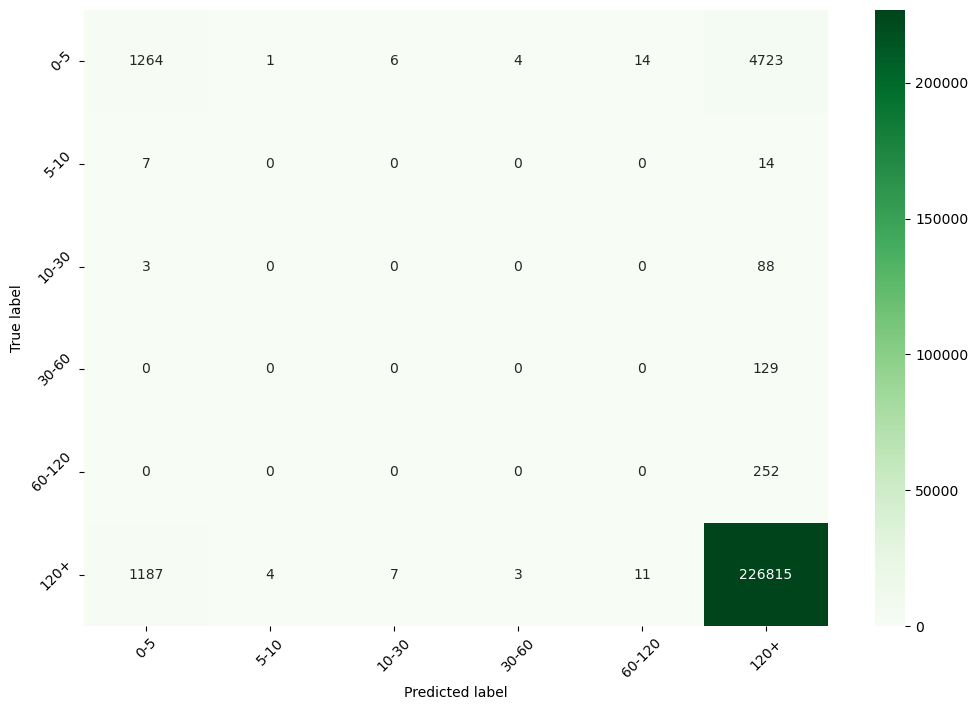

In [241]:
# create a confusion matrix to see how many predictions are in each class
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted label')
plt.ylabel('True label')
# rename xticks
plt.xticks(np.arange(6) + 0.5, ['0-5', '5-10', '10-30', '30-60', '60-120', '120+'])
plt.yticks(np.arange(6) + 0.5, ['0-5', '5-10', '10-30', '30-60', '60-120', '120+'])
#rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

In [ ]:
df5 = df3[]

In [ ]:
# Build a simple neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with an appropriate loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model with class weights
# model.fit(X_train, y_train, epochs=10, batch_size=32, class_weight={0: class_weights[0], 1: class_weights[1]})
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}')

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate additional metrics
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


Epoch 1/10
37924/37924 [==============================] - 157s 4ms/step - loss: 0.0096 - accuracy: 0.9963 - precision_2: 0.9022 - recall_2: 0.9126
Epoch 2/10
37924/37924 [==============================] - 151s 4ms/step - loss: 0.0068 - accuracy: 0.9975 - precision_2: 0.9397 - recall_2: 0.9331
Epoch 3/10
37924/37924 [==============================] - 151s 4ms/step - loss: 0.0063 - accuracy: 0.9977 - precision_2: 0.9428 - recall_2: 0.9392
Epoch 4/10
37924/37924 [==============================] - 151s 4ms/step - loss: 0.0060 - accuracy: 0.9978 - precision_2: 0.9434 - recall_2: 0.9426
Epoch 5/10
37924/37924 [==============================] - 150s 4ms/step - loss: 0.0059 - accuracy: 0.9978 - precision_2: 0.9435 - recall_2: 0.9459
Epoch 6/10
37924/37924 [==============================] - 150s 4ms/step - loss: 0.0058 - accuracy: 0.9979 - precision_2: 0.9456 - recall_2: 0.9462
Epoch 7/10
37924/37924 [==============================] - 150s 4ms/step - loss: 0.0056 - accuracy: 0.9979 - precision_

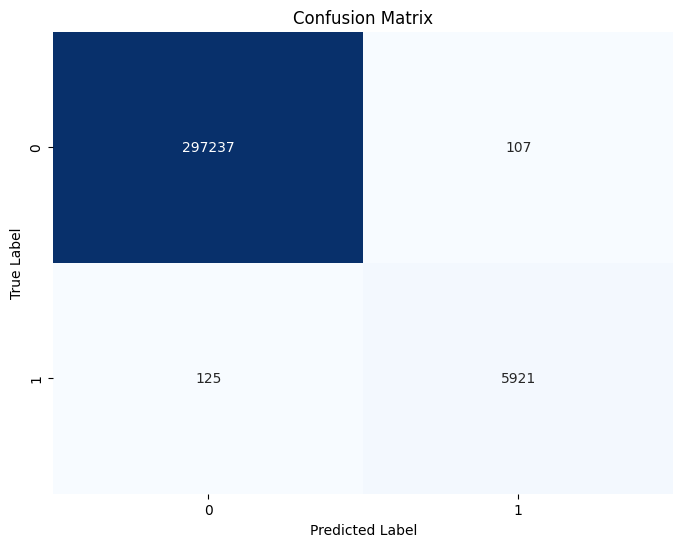

Best Tree Depth: 14
Final Model Accuracy: 0.9992353076897722


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

tree = DecisionTreeClassifier(random_state=42)
depths = np.arange(1, 21)

# Perform cross-validation for each depth
cv_scores = []
for depth in depths:
    tree.set_params(max_depth=depth)
    scores = cross_val_score(tree, X_train, y_train, cv=5)  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Find the depth with the highest cross-validated score
best_depth = depths[np.argmax(cv_scores)]

# Train the final model with the best depth on the full training set
final_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_tree.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred_final = final_tree.predict(X_test)
accuracy_final = accuracy_score(y_test, y_pred_final)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print the results
print("Best Tree Depth:", best_depth)
print("Final Model Accuracy:", accuracy_final)


In [11]:
precision_dt = precision_score(y_test, y_pred_final, average='weighted')
recall_dt = recall_score(y_test, y_pred_final, average='weighted')
f1_dt = f1_score(y_test, y_pred_final, average='weighted')

# Print the results
print("Decision Tree Metrics:")
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)
print("\n")


Decision Tree Metrics:
Precision: 0.9992342795002369
Recall: 0.9992353076897722
F1 Score: 0.9992347492580583




In [12]:
precision_dt_class0 = precision_score(y_test, y_pred_final, labels=[0], average='weighted')
recall_dt_class0 = recall_score(y_test, y_pred_final, labels=[0], average='weighted')
f1_dt_class0 = f1_score(y_test, y_pred_final, labels=[0], average='weighted')

precision_dt_class1 = precision_score(y_test, y_pred_final, labels=[1], average='weighted')
recall_dt_class1 = recall_score(y_test, y_pred_final, labels=[1], average='weighted')
f1_dt_class1 = f1_score(y_test, y_pred_final, labels=[1], average='weighted')

print("Decision Tree Metrics - Class 0:")
print("Precision:", precision_dt_class0)
print("Recall:", recall_dt_class0)
print("F1 Score:", f1_dt_class0)
print("\n")

print("Decision Tree Metrics - Class 1:")
print("Precision:", precision_dt_class1)
print("Recall:", recall_dt_class1)
print("F1 Score:", f1_dt_class1)
print("\n")

Decision Tree Metrics - Class 0:
Precision: 0.9995796369408332
Recall: 0.9996401474386569
F1 Score: 0.9996098912740079


Decision Tree Metrics - Class 1:
Precision: 0.9822495023224951
Recall: 0.9793251736685412
F1 Score: 0.9807851581911546




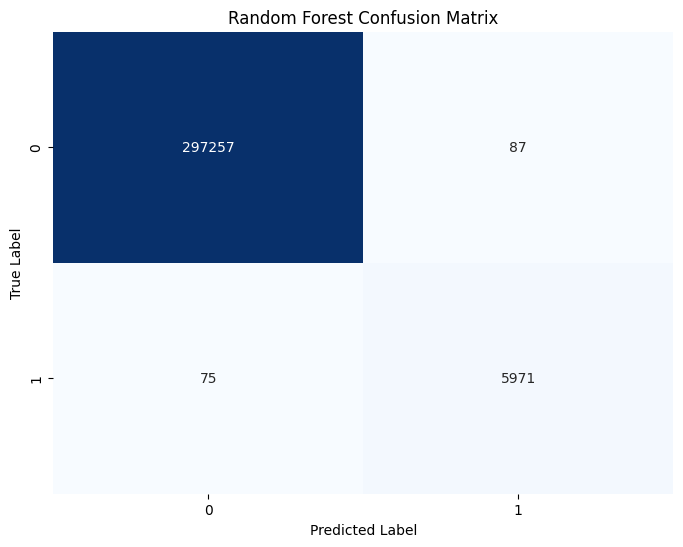

Best Random Forest Model Parameters: {'max_depth': None, 'n_estimators': 200}
Random Forest Accuracy: 0.9994660338178583


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state=42)

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
           )
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print the results
print("Best Random Forest Model Parameters:", grid_search.best_params_)
print("Random Forest Accuracy:", accuracy_rf)

In [14]:
# Random Forest
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Metrics:")
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Metrics:
Precision: 0.9994665918691594
Recall: 0.9994660338178583
F1 Score: 0.9994662931195103


In [15]:
precision_rf_class0 = precision_score(y_test, y_pred_rf, labels=[0], average='weighted')
recall_rf_class0 = recall_score(y_test, y_pred_rf, labels=[0], average='weighted')
f1_rf_class0 = f1_score(y_test, y_pred_rf, labels=[0], average='weighted')

precision_rf_class1 = precision_score(y_test, y_pred_rf, labels=[1], average='weighted')
recall_rf_class1 = recall_score(y_test, y_pred_rf, labels=[1], average='weighted')
f1_rf_class1 = f1_score(y_test, y_pred_rf, labels=[1], average='weighted')

print("Random Forest Metrics - Class 0:")
print("Precision:", precision_rf_class0)
print("Recall:", recall_rf_class0)
print("F1 Score:", f1_rf_class0)
print("\n")

print("Random Forest Metrics - Class 1:")
print("Precision:", precision_rf_class1)
print("Recall:", recall_rf_class1)
print("F1 Score:", f1_rf_class1)

Random Forest Metrics - Class 0:
Precision: 0.9997477567163979
Recall: 0.9997074095996556
F1 Score: 0.9997275827509434


Random Forest Metrics - Class 1:
Precision: 0.9856388246946187
Recall: 0.9875951042011247
F1 Score: 0.9866159947124918
